In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
df.shape

(2000, 8)

In [5]:
print('Number of Null Values: ')
df.isna().sum()

Number of Null Values: 


CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [6]:
print(f'Number of Duplicated Values: {df.duplicated().sum()}')

Number of Duplicated Values: 0


In [7]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [8]:
df.describe(include='object')

,Gender,Profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [17]:
new_df = df.copy()

new_df = new_df.rename(columns={
    'CustomerID': 'Id',
    'Annual Income ($)': 'Income',
    'Spending Score (1-100)': 'SpendingScore',
    'Work Experience': 'WorkExperience',
    'Family Size': 'Family'
})
new_df.columns

Index(['Id', 'Gender', 'Age', 'Income', 'SpendingScore', 'Profession',
       'WorkExperience', 'Family'],
      dtype='object')

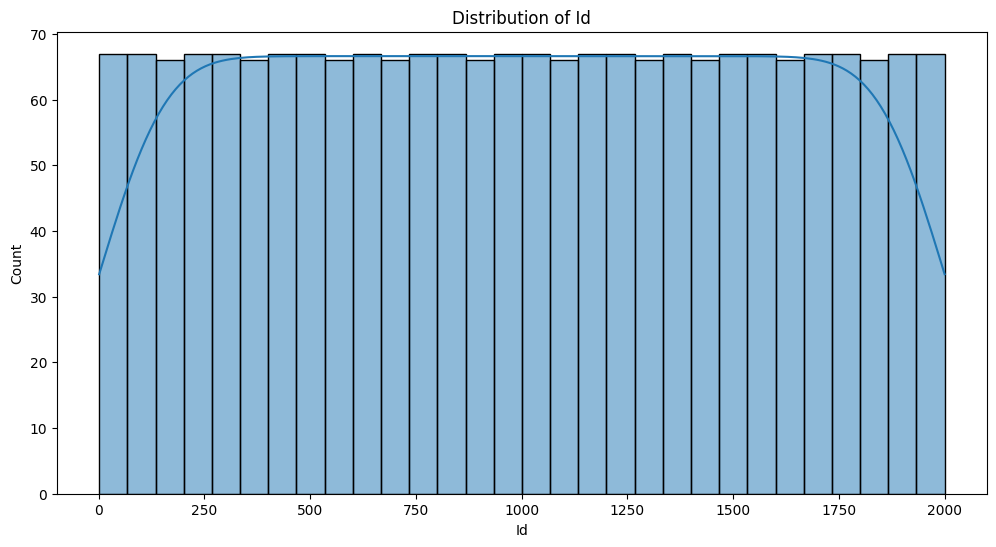

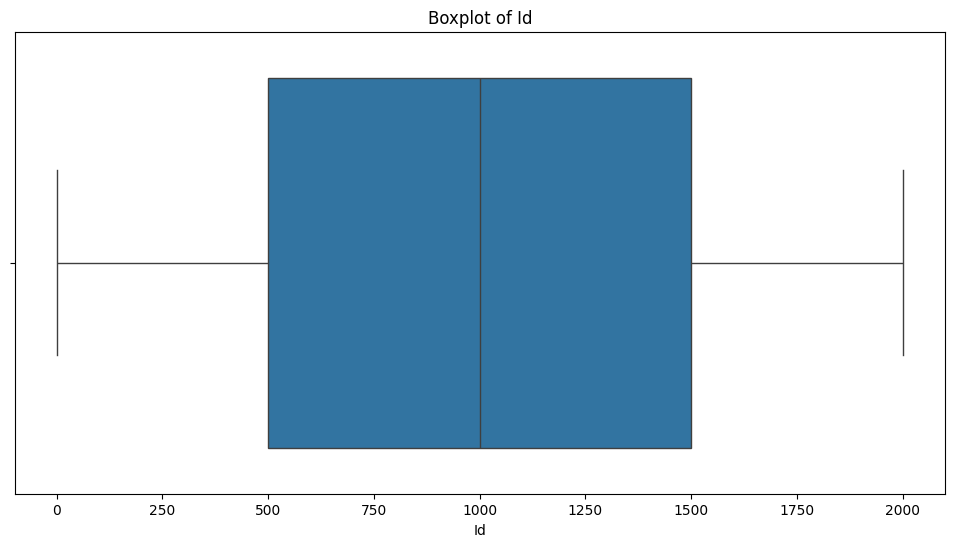

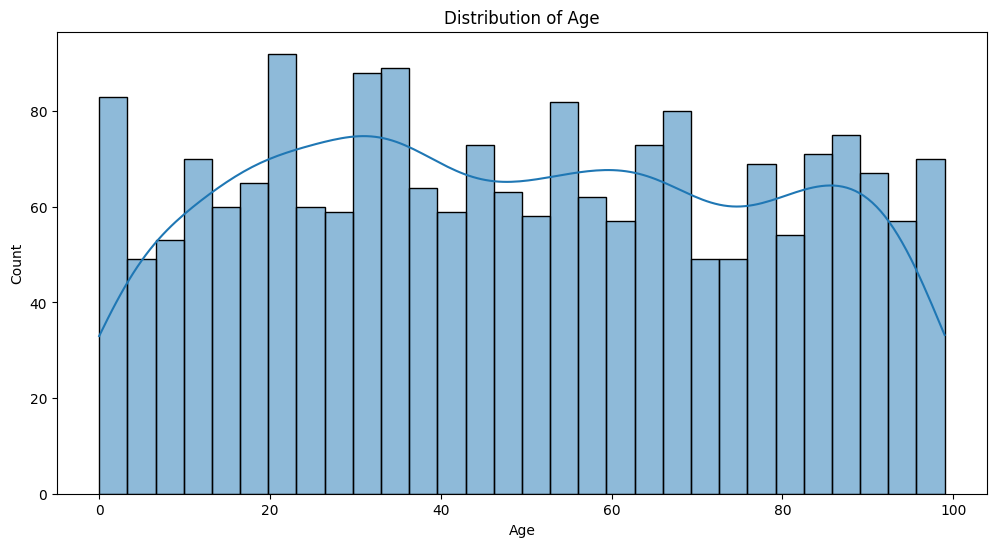

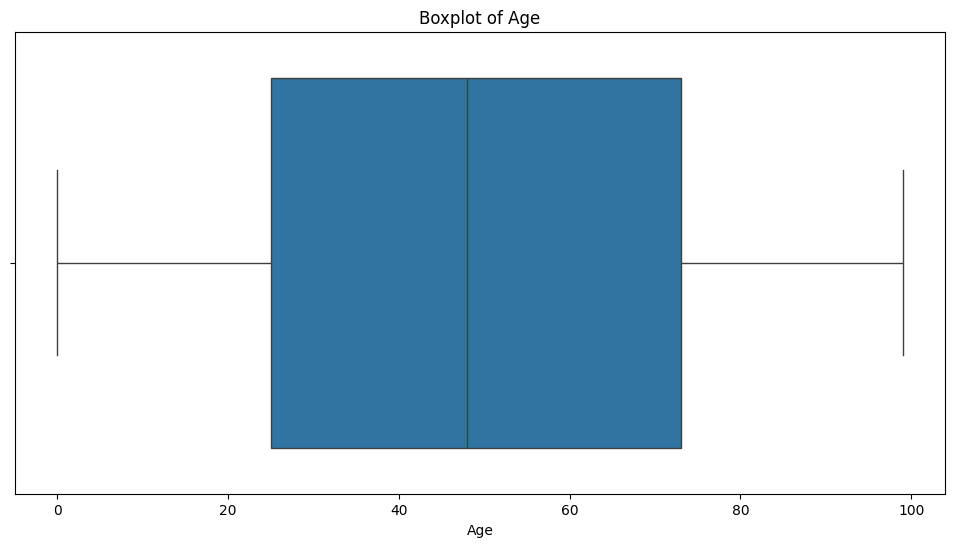

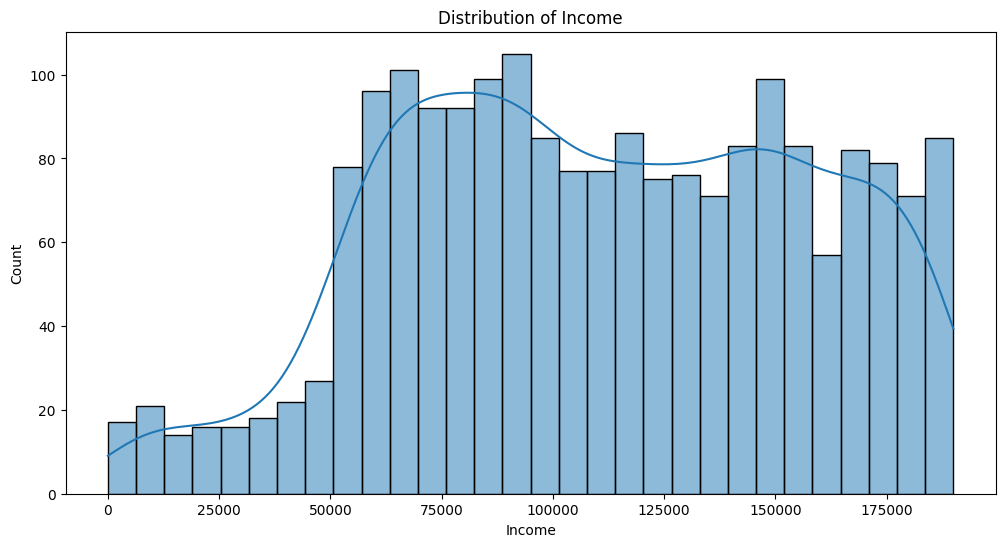

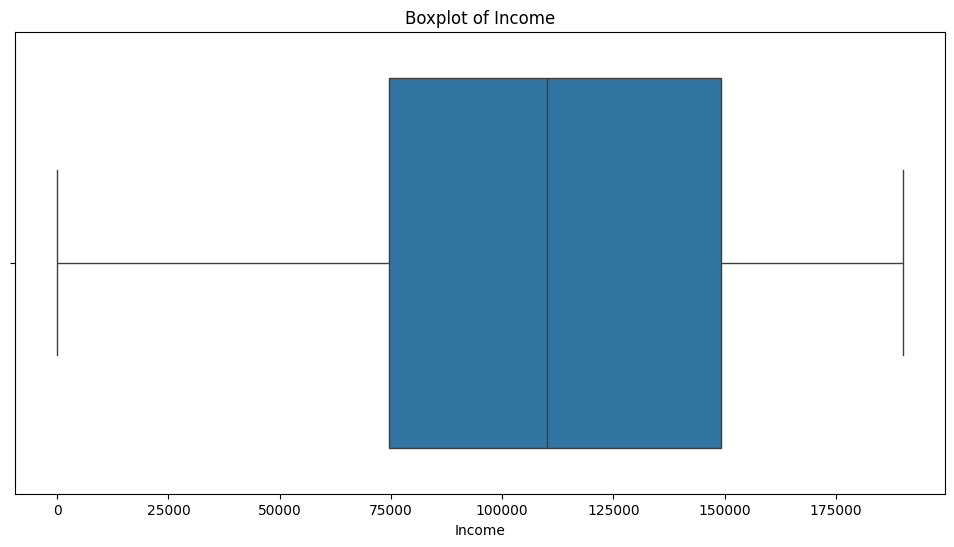

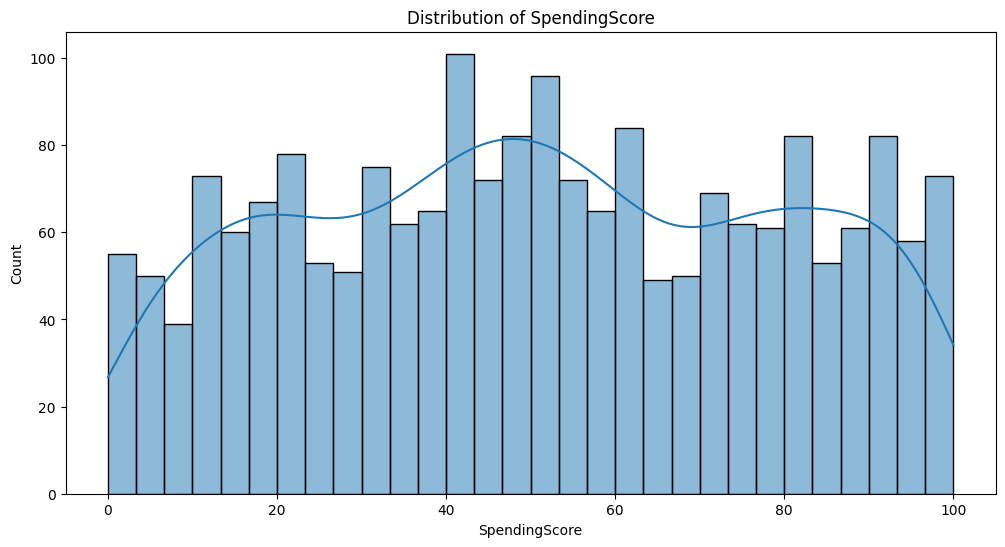

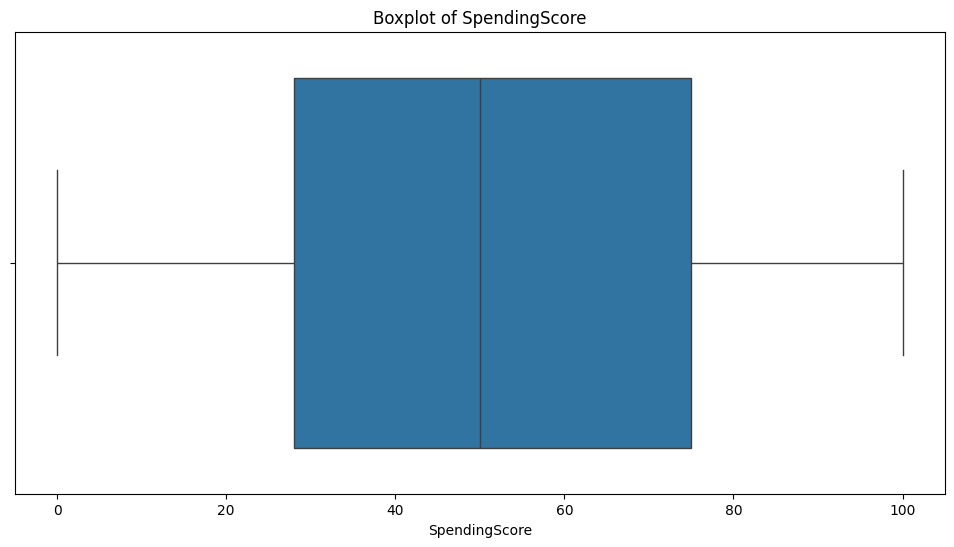

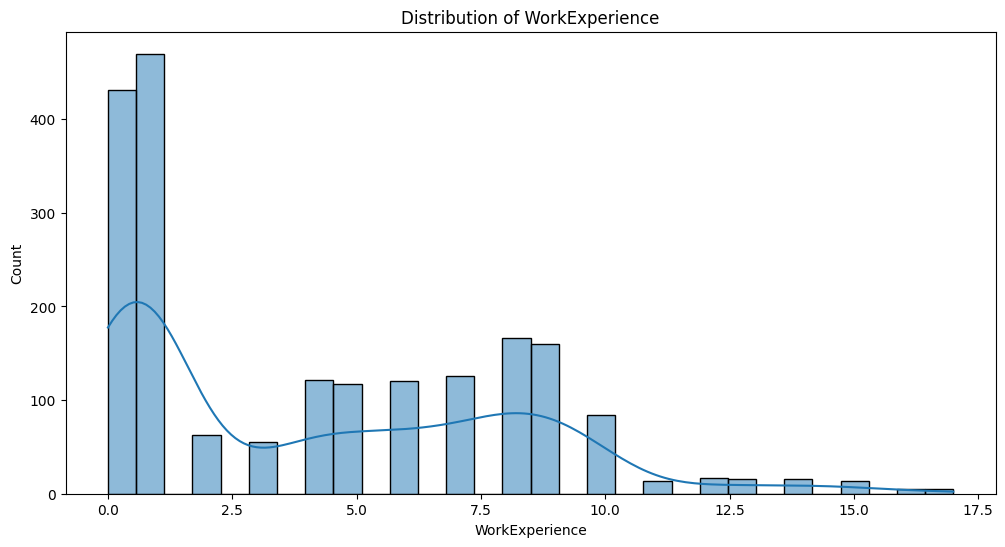

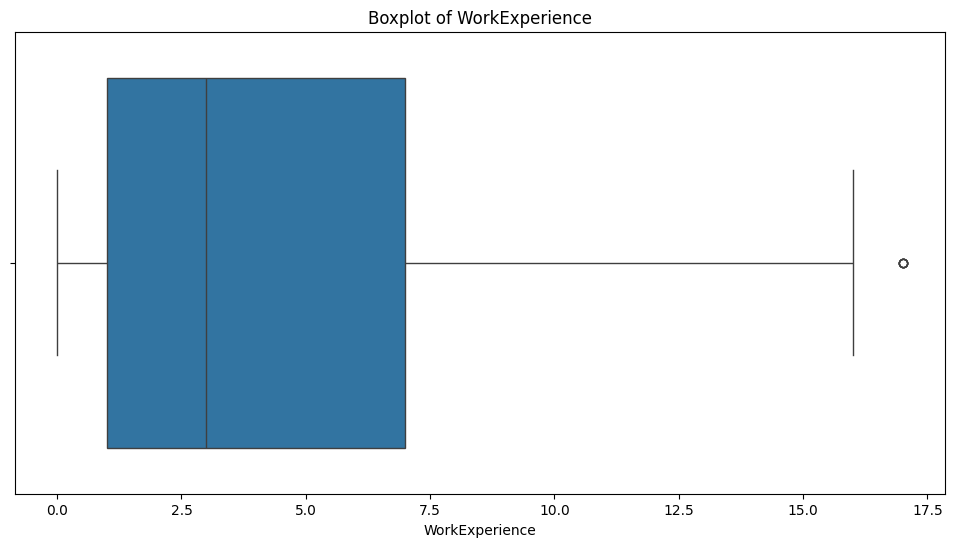

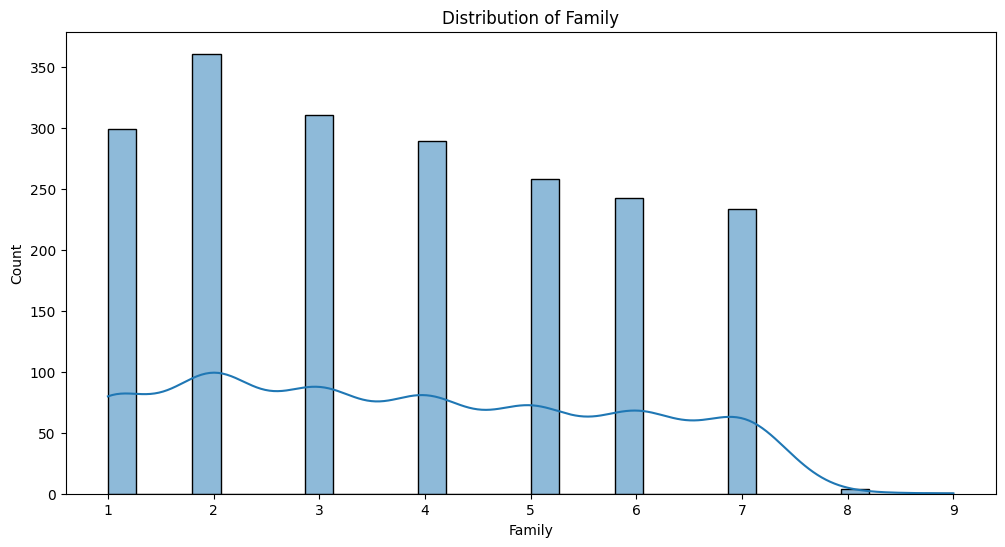

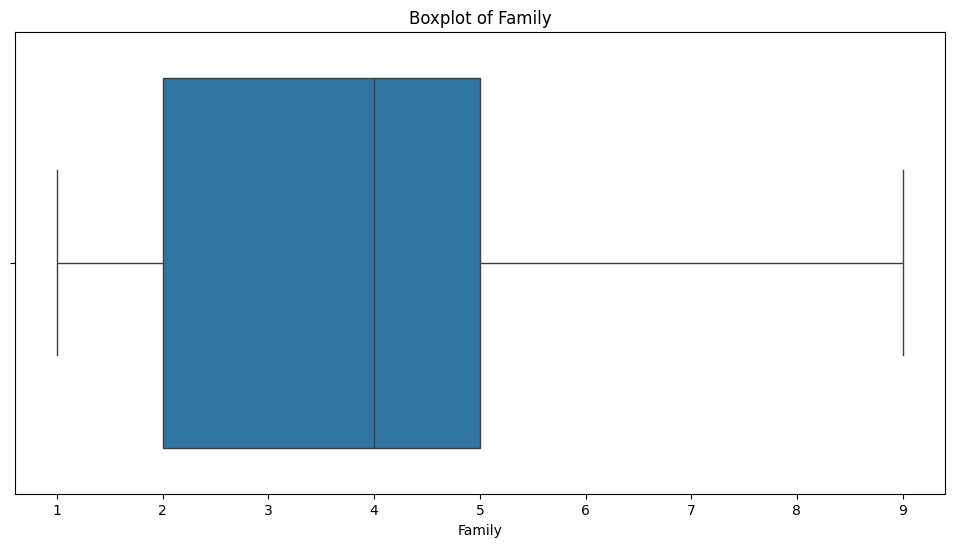

In [19]:
numerical_columns = new_df.select_dtypes(include='number').columns
object_columns = new_df.select_dtypes(include='object').columns

for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    sns.histplot(new_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=new_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

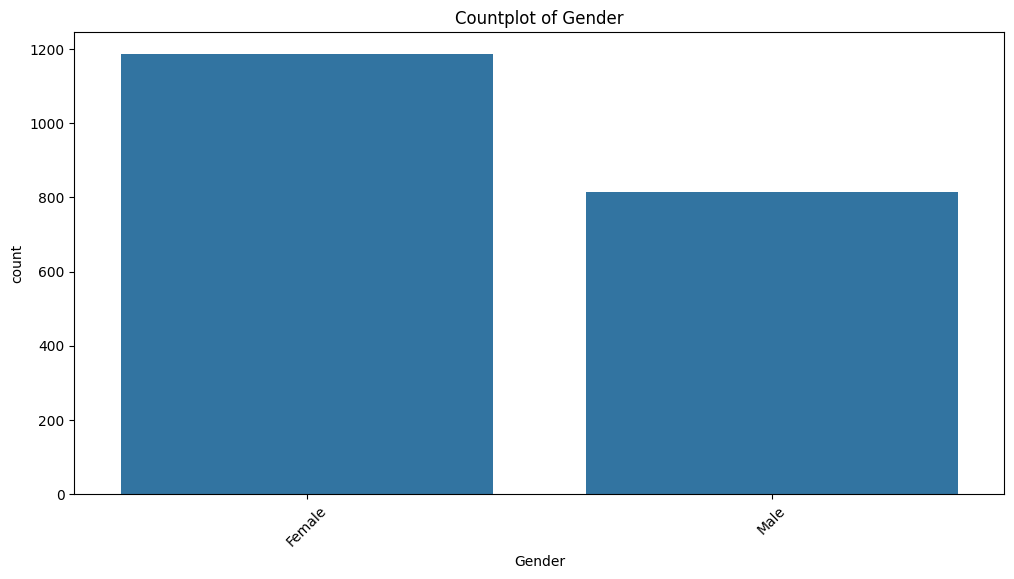

C:\Users\rayha\AppData\Local\Temp\ipykernel_34088\1939528357.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=new_df[col], y=numerical_columns[0], data=new_df, ci=None, estimator=sum)


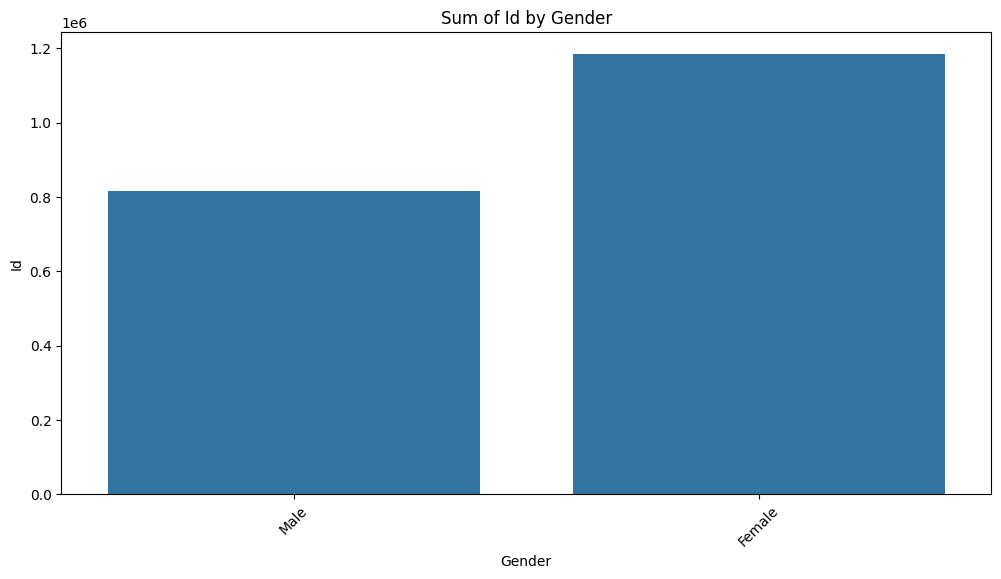

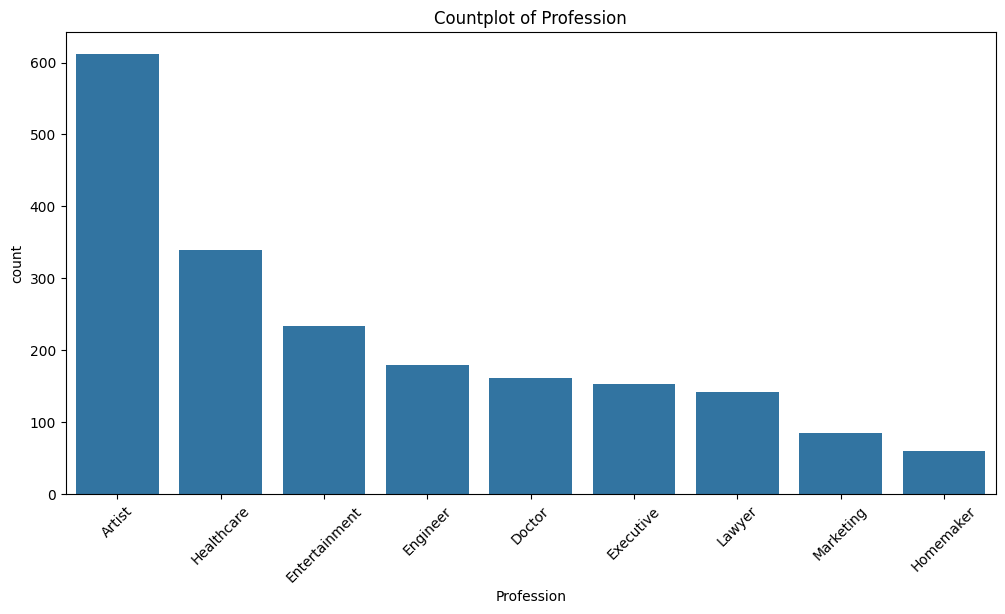

C:\Users\rayha\AppData\Local\Temp\ipykernel_34088\1939528357.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=new_df[col], y=numerical_columns[0], data=new_df, ci=None, estimator=sum)


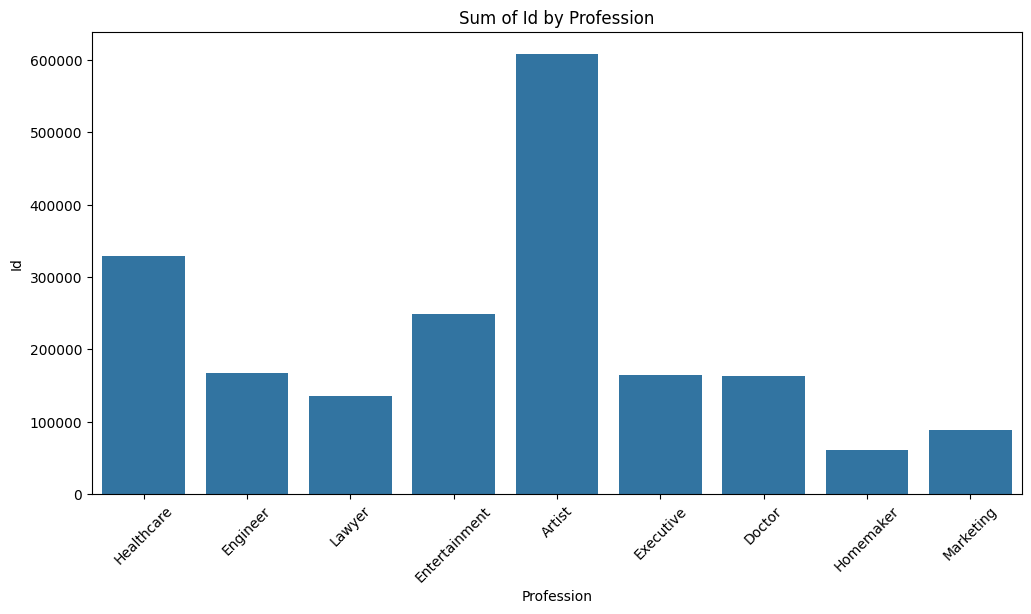

In [20]:
for col in object_columns:
    plt.figure(figsize=(12, 6))
    
    sns.countplot(x=new_df[col], order=new_df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()
    
    if len(numerical_columns) > 0:
        plt.figure(figsize=(12, 6))
        sns.barplot(x=new_df[col], y=numerical_columns[0], data=new_df, ci=None, estimator=sum)
        plt.title(f'Sum of {numerical_columns[0]} by {col}')
        plt.xticks(rotation=45)
        plt.show()

In [26]:
new_df = new_df.dropna()
new_df.shape

(1965, 8)

In [27]:
Q1 = new_df[numerical_columns].quantile(0.25)
Q3 = new_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (new_df[numerical_columns] < lower_bound) | (new_df[numerical_columns] > upper_bound)
outliers_rows = outliers.any(axis=1)
outliers_data = new_df[outliers_rows]
outliers_data.value_counts()

Id   Gender  Age  Income  SpendingScore  Profession  WorkExperience  Family
393  Male    21   119116  30             Artist      17              4         1
406  Female  65   119889  11             Artist      17              6         1
474  Male    20   130813  92             Artist      17              5         1
567  Female  19   180331  14             Artist      17              5         1
604  Female  91   69720   78             Lawyer      17              6         1
Name: count, dtype: int64

In [28]:
new_df = new_df[~outliers_rows]
new_df.shape

(1960, 8)

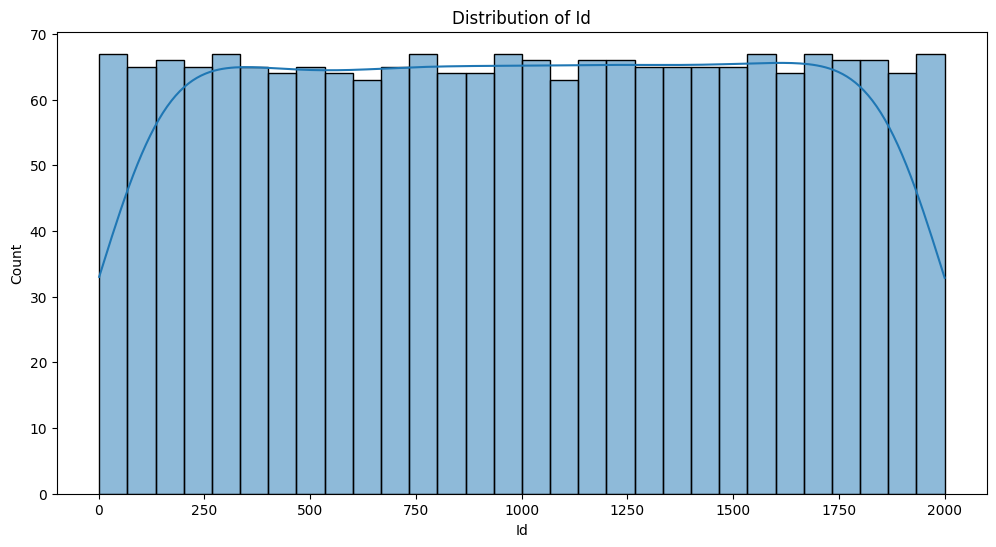

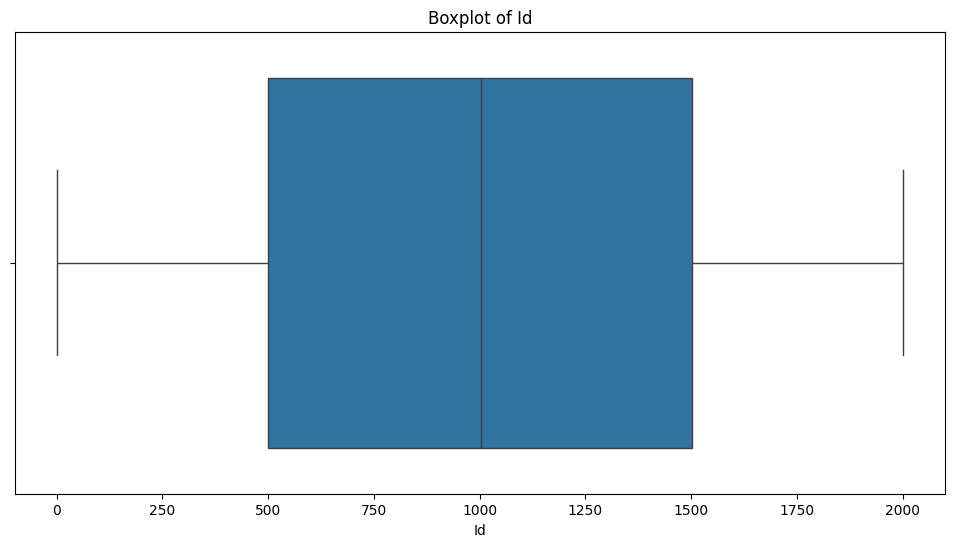

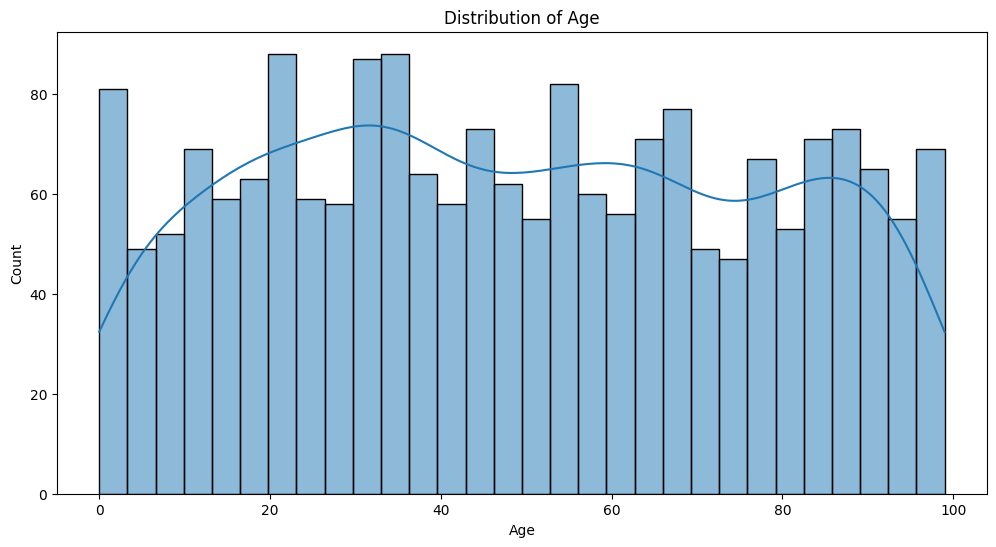

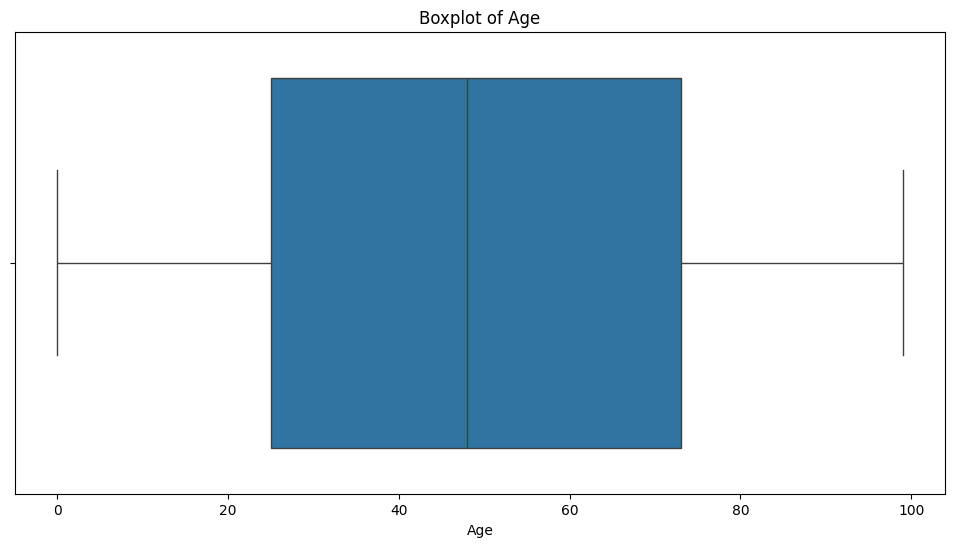

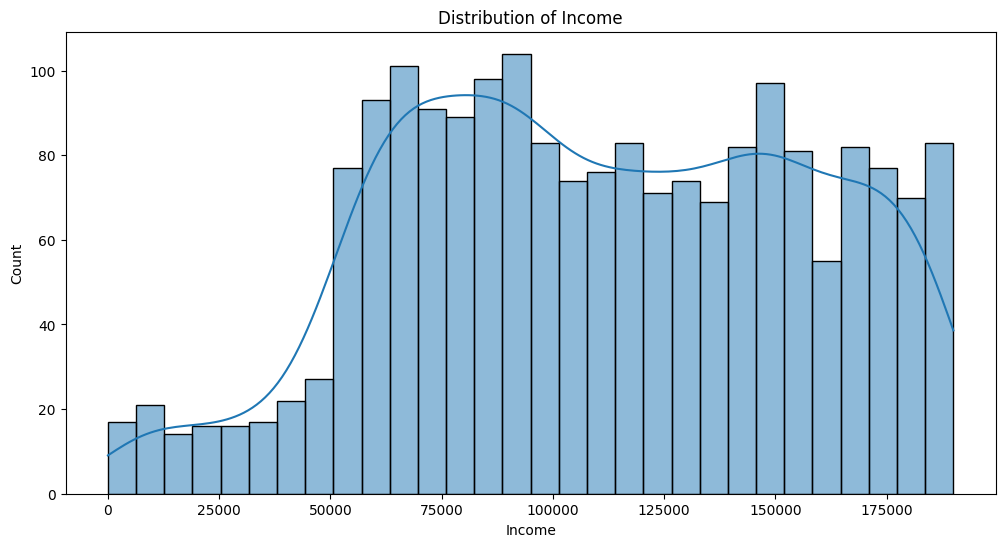

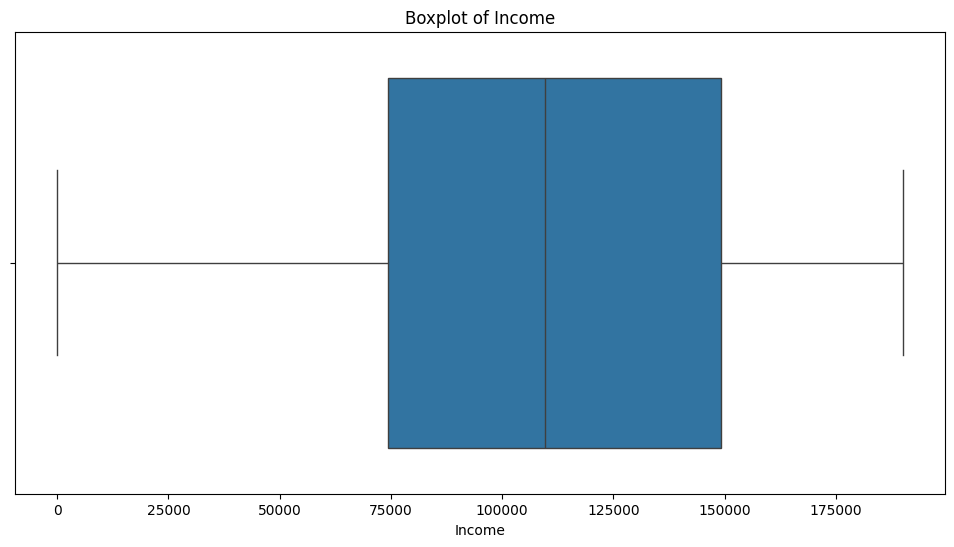

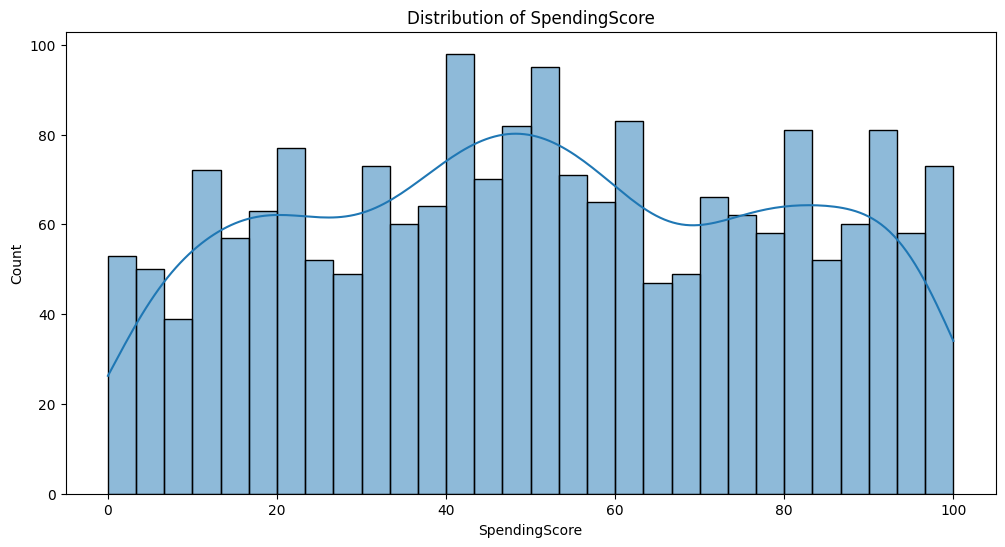

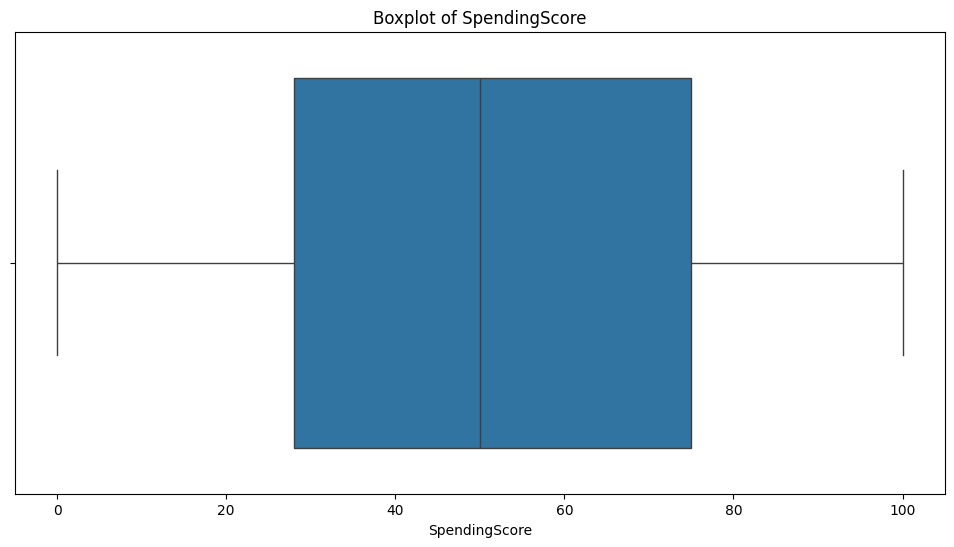

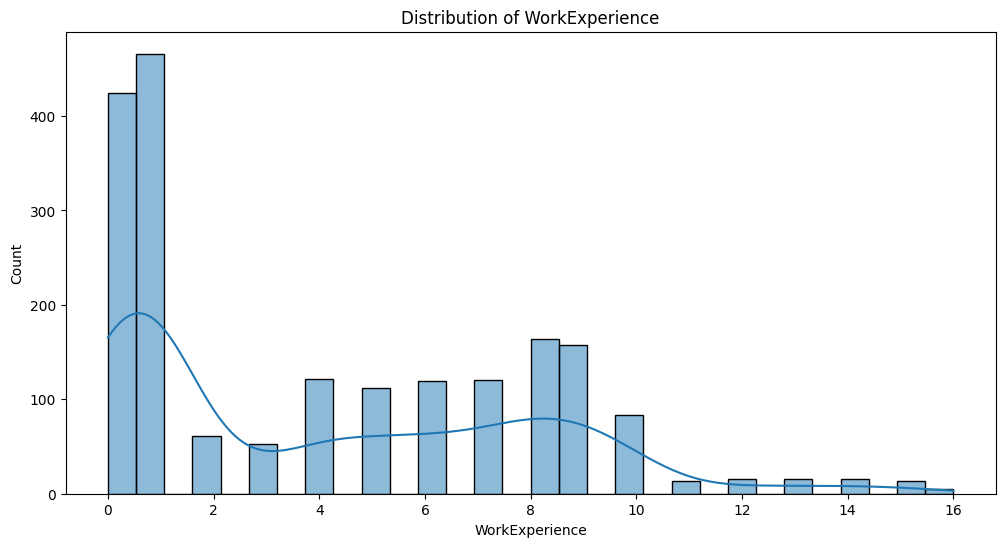

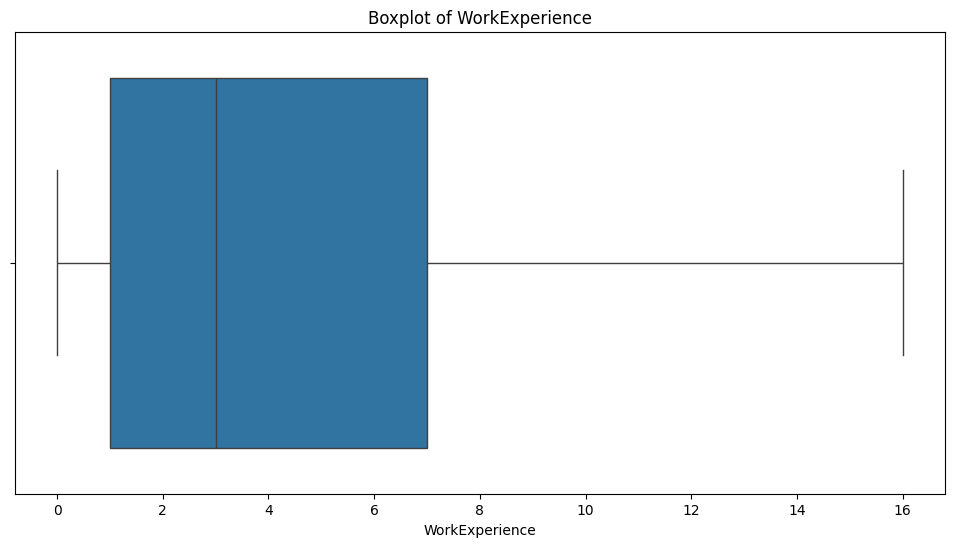

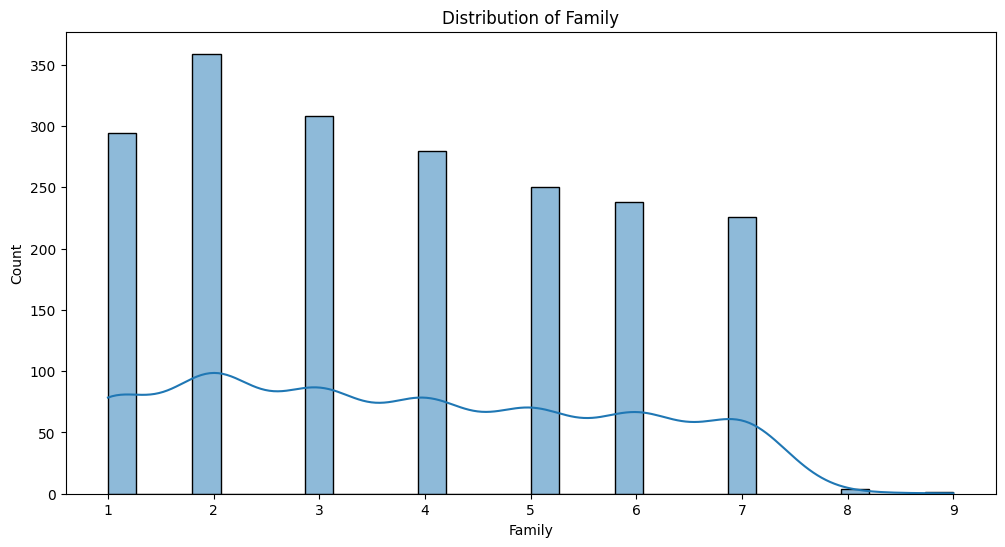

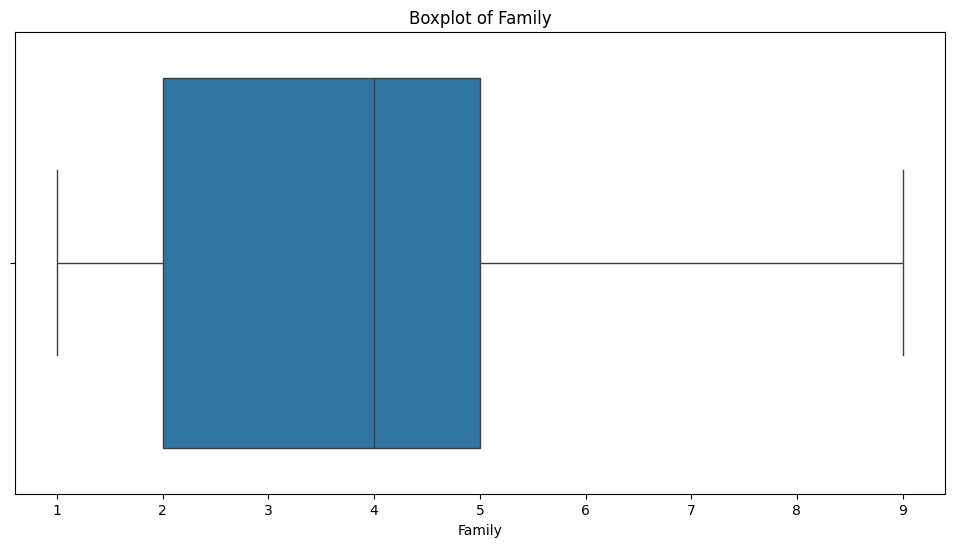

In [29]:
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    sns.histplot(new_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=new_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [34]:
filtered_df = new_df[~(new_df['Age'] <= new_df['WorkExperience'])]
filtered_df.shape

(1858, 8)

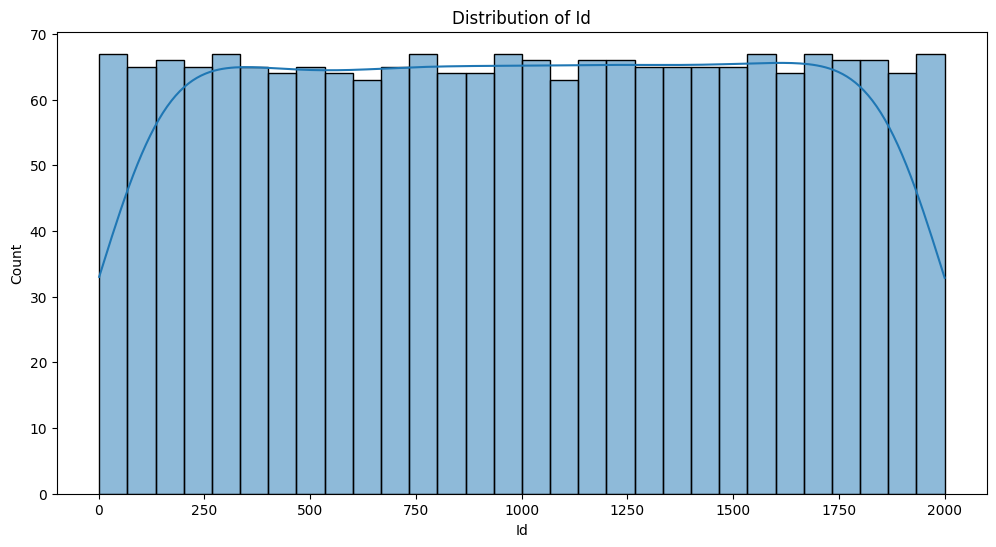

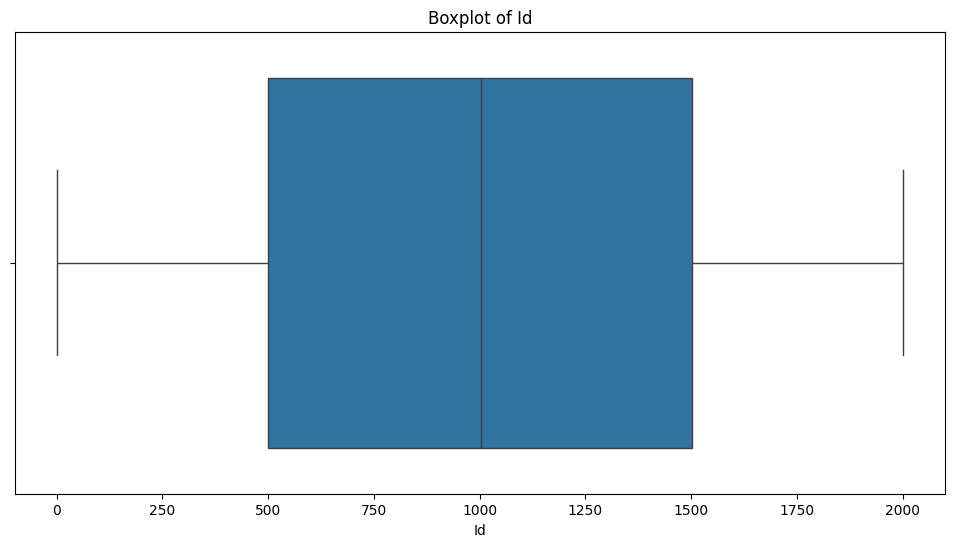

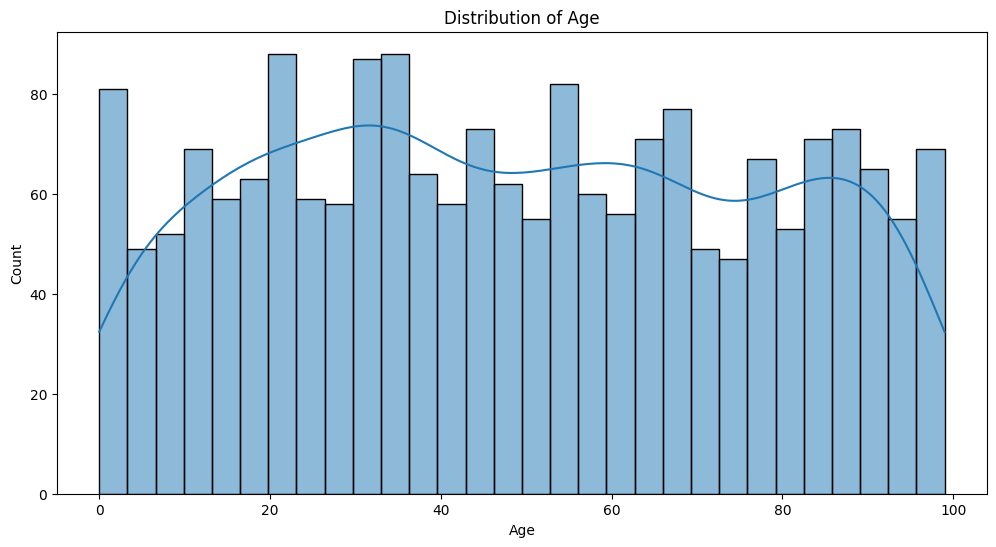

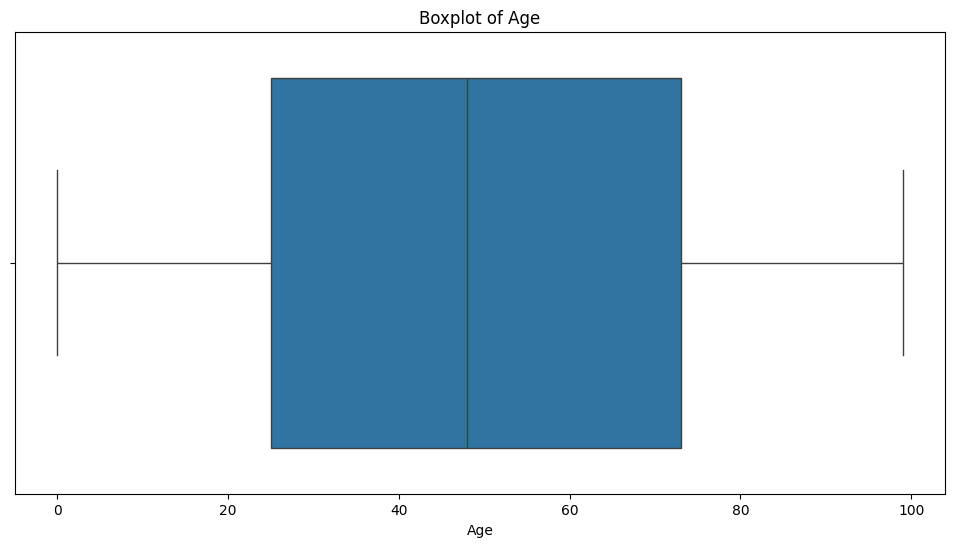

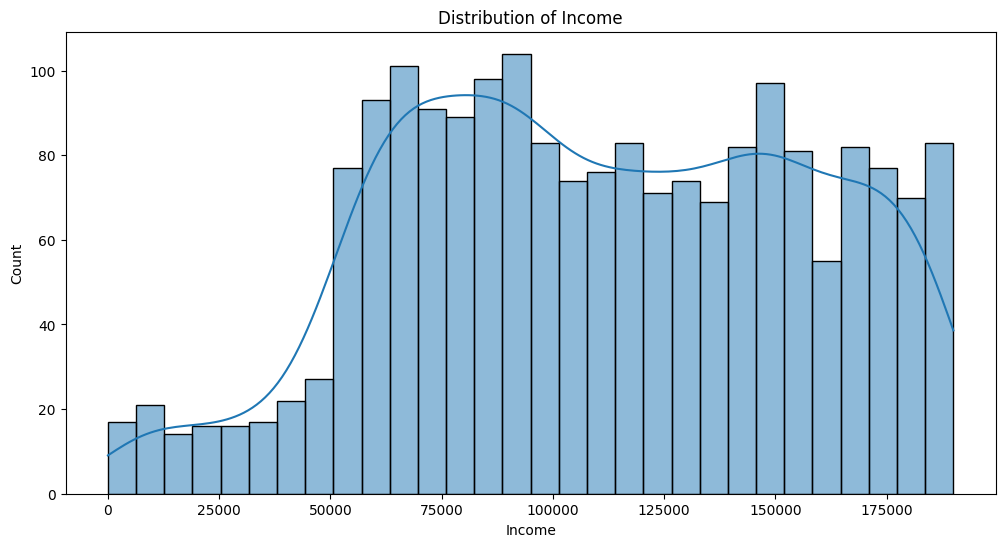

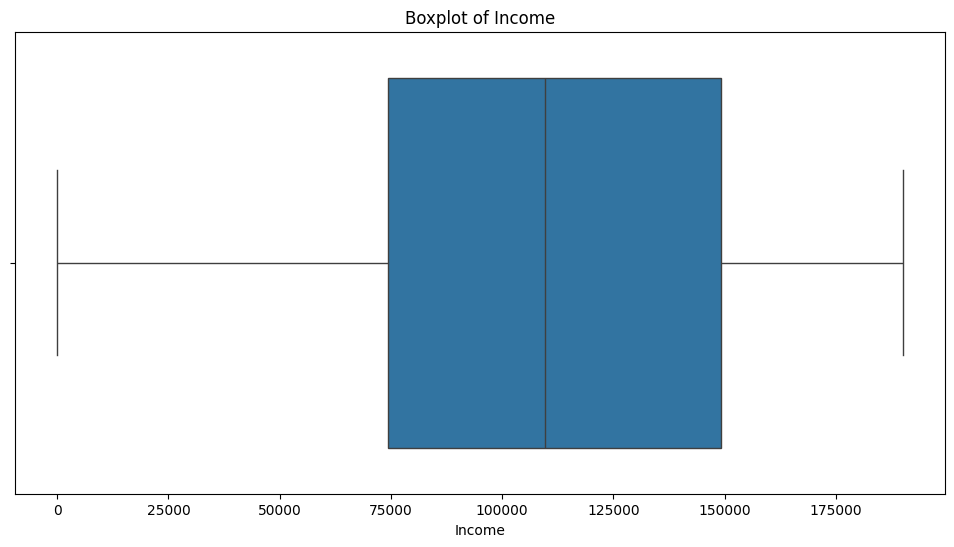

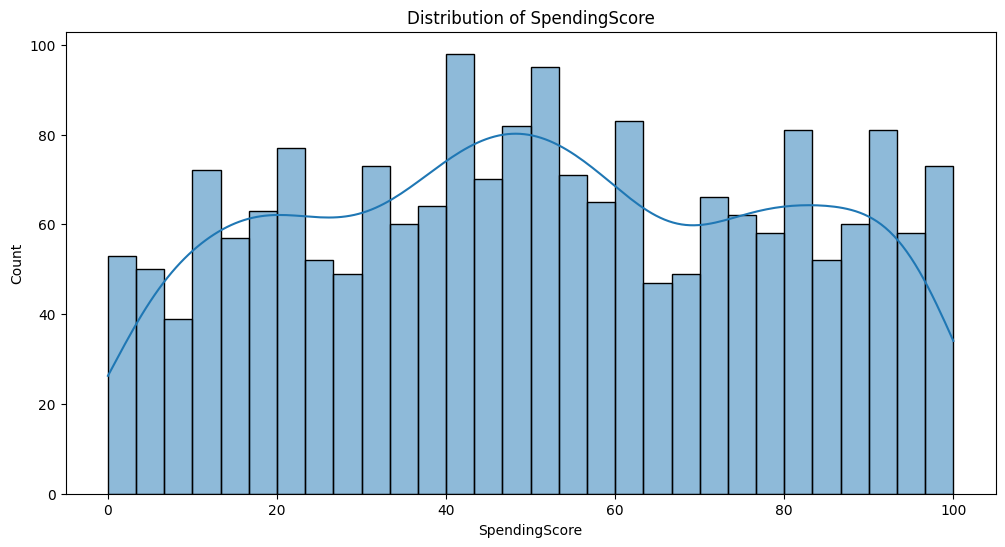

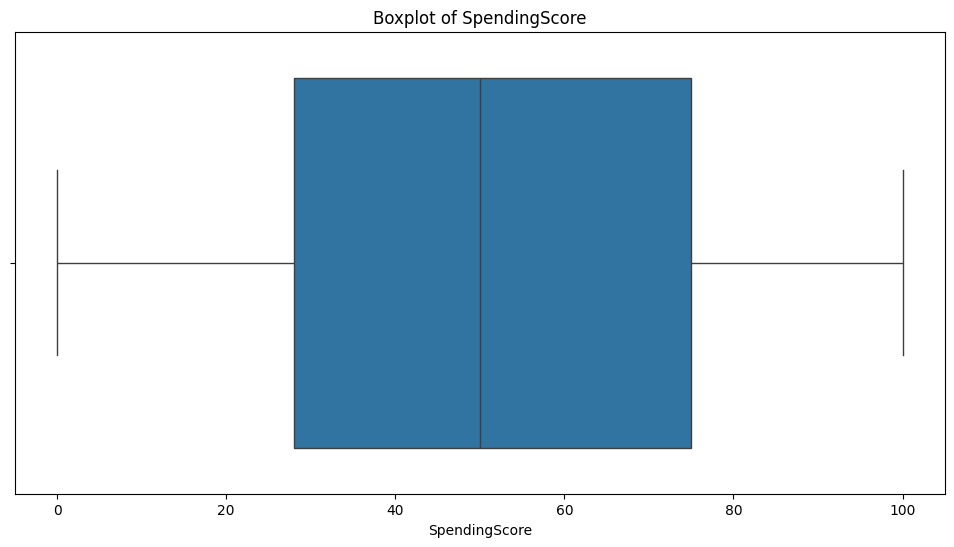

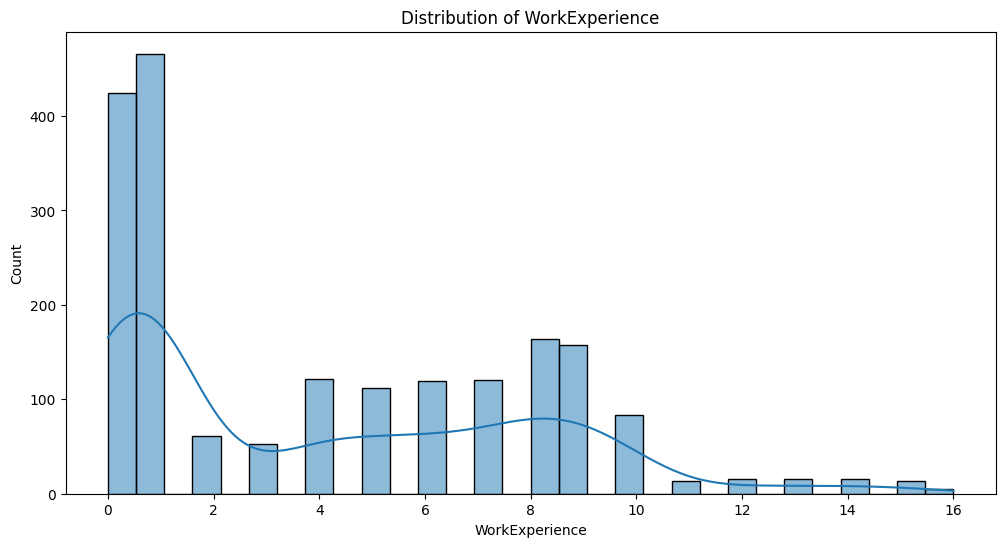

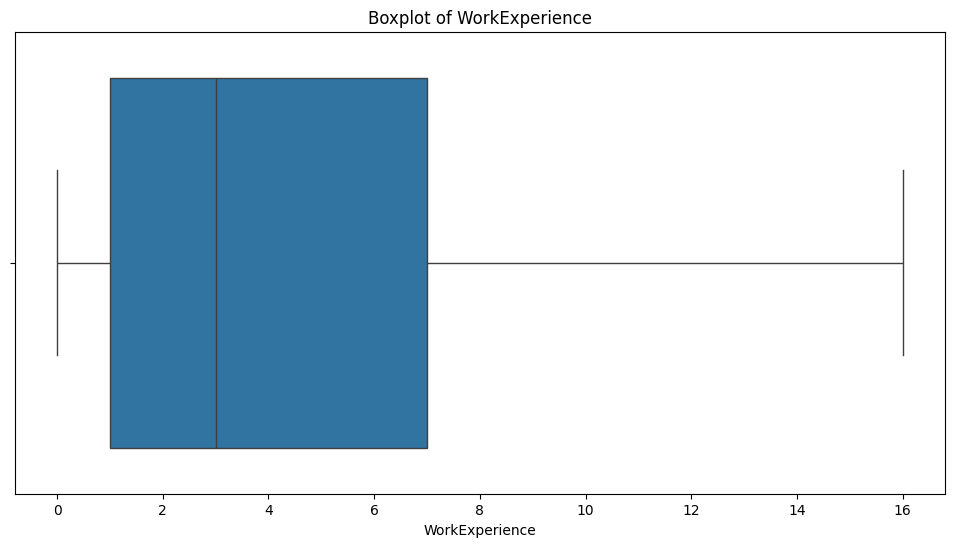

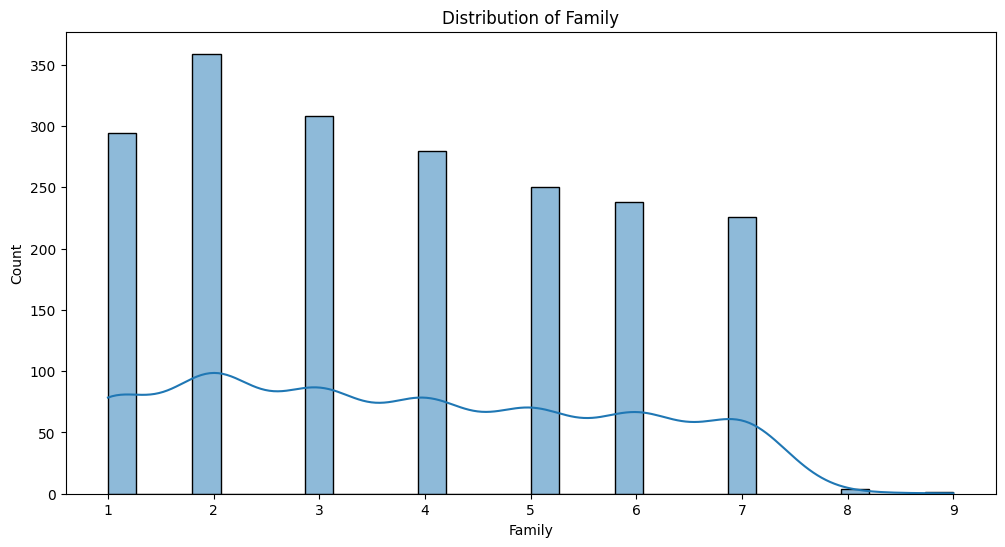

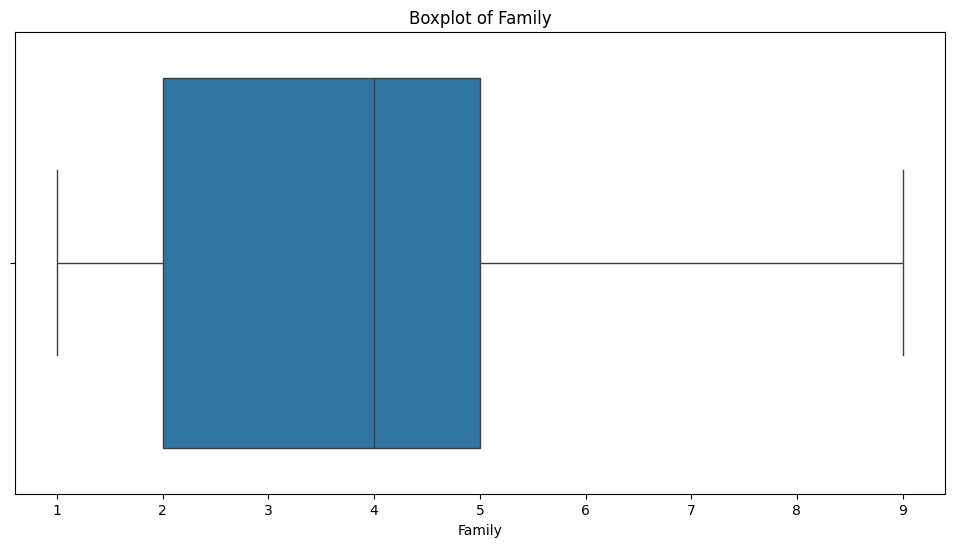

In [35]:
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    sns.histplot(new_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=new_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [36]:
filtered_df.to_csv('New_Customers.csv', index=False)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
scaler = StandardScaler()

for col in object_columns:
    filtered_df[col] = encoder.fit_transform(filtered_df[col])

C:\Users\rayha\AppData\Local\Temp\ipykernel_34088\1149471424.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = encoder.fit_transform(filtered_df[col])
C:\Users\rayha\AppData\Local\Temp\ipykernel_34088\1149471424.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = encoder.fit_transform(filtered_df[col])


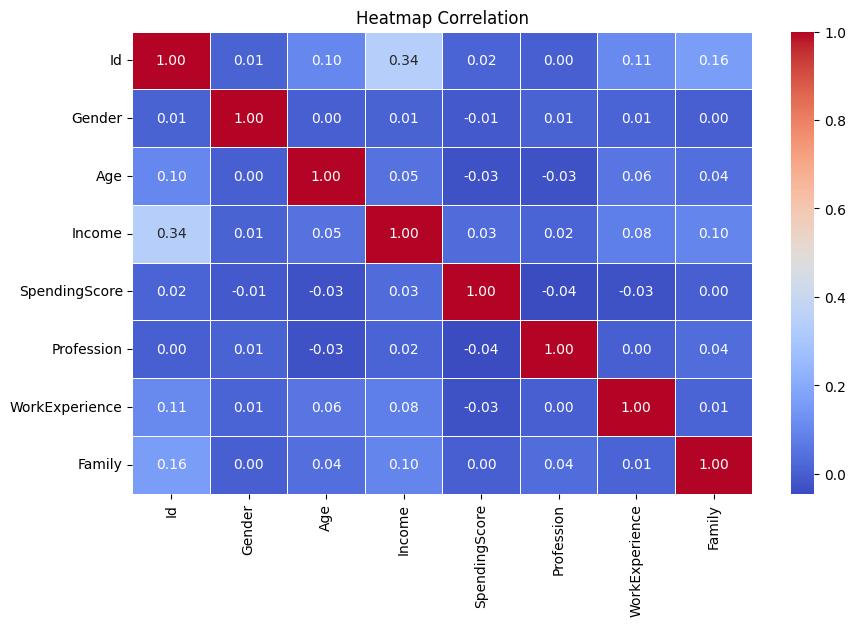

In [39]:
corr = filtered_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(data=corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Correlation')
plt.show()

In [41]:
scaled_df = scaler.fit_transform(filtered_df)

In [47]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1858 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Id              1858 non-null   int64
 1   Gender          1858 non-null   int32
 2   Age             1858 non-null   int64
 3   Income          1858 non-null   int64
 4   SpendingScore   1858 non-null   int64
 5   Profession      1858 non-null   int32
 6   WorkExperience  1858 non-null   int64
 7   Family          1858 non-null   int64
 8   Cluster         1858 non-null   int32
dtypes: int32(3), int64(6)
memory usage: 123.4 KB


In [42]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

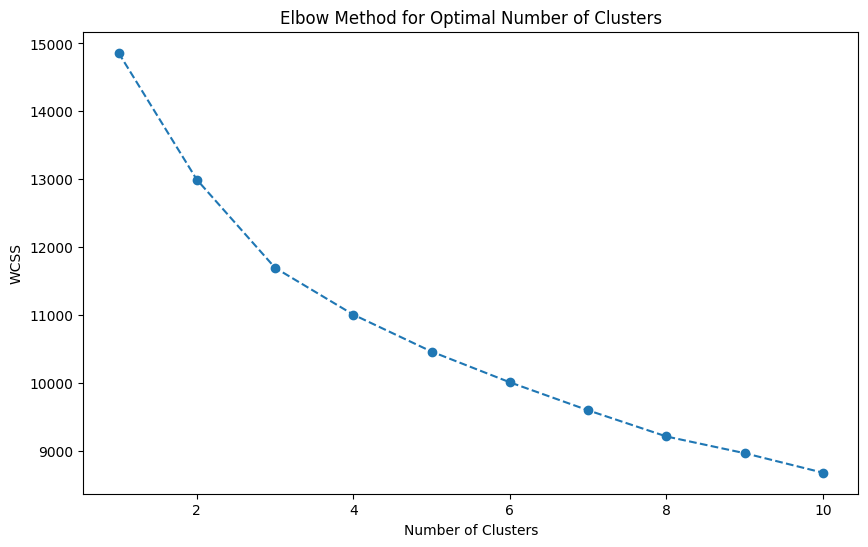

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

C:\Users\rayha\AppData\Local\Temp\ipykernel_34088\2350814532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = clusters


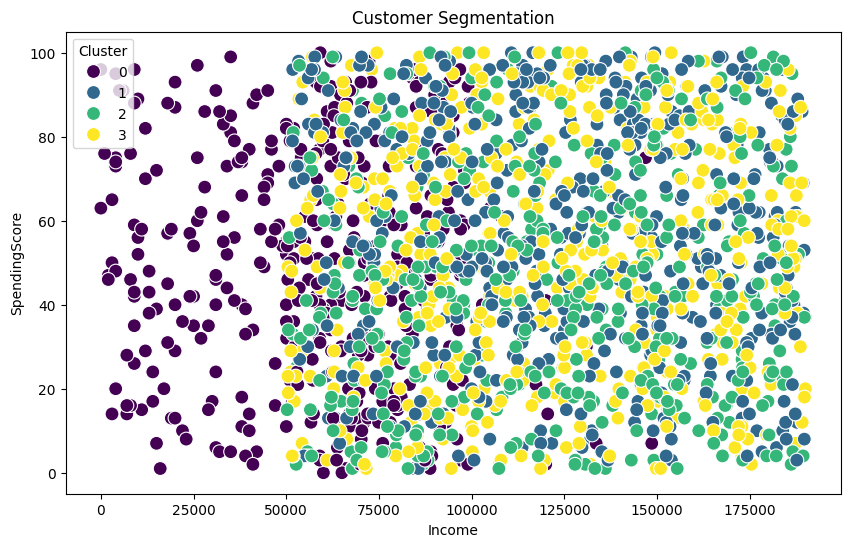

In [48]:
filtered_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Income', y='SpendingScore', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.show()

In [49]:
cluster_summary = filtered_df.groupby('Cluster').mean()
print(cluster_summary)

                  Id    Gender        Age         Income  SpendingScore  \
Cluster                                                                   
0         274.323529  0.370098  42.901961   58738.254902      48.274510   
1        1130.580897  0.000000  51.851852  127054.990253      56.810916   
2        1295.748344  0.267108  59.713024  123057.858720      44.960265   
3        1179.518595  1.000000  50.303719  123059.853306      52.340909   

         Profession  WorkExperience    Family  
Cluster                                        
0          2.843137        3.115196  2.796569  
1          2.781676        1.417154  4.011696  
2          2.907285        8.743929  4.013245  
3          2.793388        2.628099  4.041322  


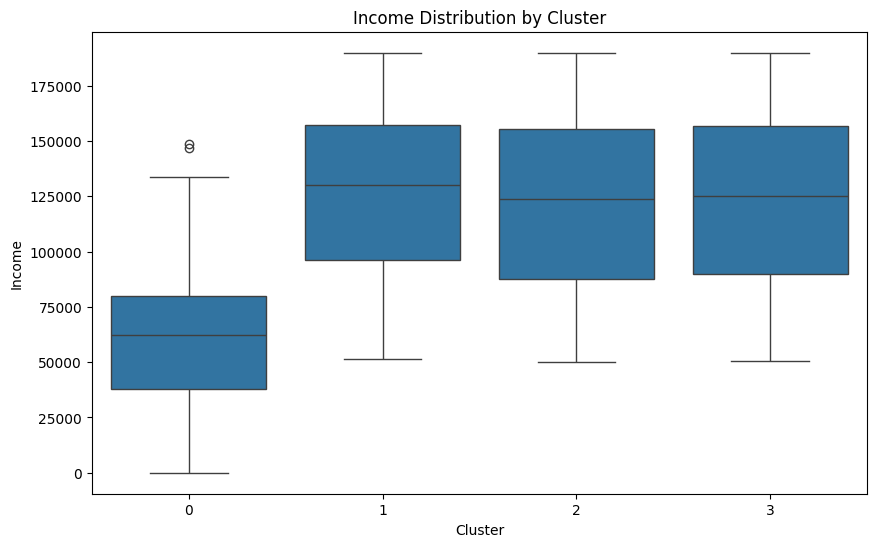

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=filtered_df)
plt.title('Income Distribution by Cluster')
plt.show()